# Logistic Regression

Predicting if a particular employee is with the company or not. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

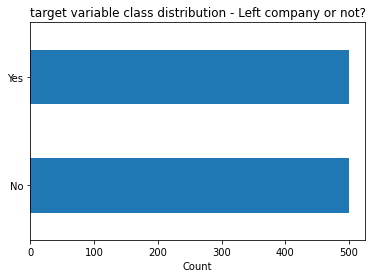

In [3]:
# insert code
df['left_company'].value_counts().plot.barh()
plt.title('target variable class distribution - Left company or not?')
plt.xlabel('Count')
plt.show()

> There seems to be no class imbalance as both the classes have equal representation. However, once we split this into train and test, I need to check if there is any imbalance in the train dataset. 

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [4]:
features = [x for x in df.columns if x != 'left_company']
print(features)

['age', 'frequency_of_travel', 'department', 'commuting_distance', 'education', 'satisfaction_with_environment', 'gender', 'seniority_level', 'position', 'satisfaction_with_job', 'married_or_single', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']


In [5]:
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [6]:
encoded_categorical_vars = ['education', 'satisfaction_with_environment','seniority_level', 'satisfaction_with_job','last_performance_rating']
numerical_vars = df[features].select_dtypes(exclude = 'object').columns.to_list()
numerical_vars = [x for x in numerical_vars if x not in encoded_categorical_vars]
categorical_vars = df[features].select_dtypes(include = 'object').columns.to_list()

print(categorical_vars)
print(numerical_vars)
print(encoded_categorical_vars)

['frequency_of_travel', 'department', 'gender', 'position', 'married_or_single']
['age', 'commuting_distance', 'last_raise_pct', 'total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']
['education', 'satisfaction_with_environment', 'seniority_level', 'satisfaction_with_job', 'last_performance_rating']


In [7]:
print((len(encoded_categorical_vars) + len(numerical_vars) + len(categorical_vars)) == len(features))

True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   left_company                   1000 non-null   object
 1   age                            1000 non-null   int64 
 2   frequency_of_travel            1000 non-null   object
 3   department                     1000 non-null   object
 4   commuting_distance             1000 non-null   int64 
 5   education                      1000 non-null   int64 
 6   satisfaction_with_environment  1000 non-null   int64 
 7   gender                         1000 non-null   object
 8   seniority_level                1000 non-null   int64 
 9   position                       1000 non-null   object
 10  satisfaction_with_job          1000 non-null   int64 
 11  married_or_single              1000 non-null   object
 12  last_raise_pct                 1000 non-null   int64 
 13  last

> The list of encoded categorical variables are features that are categorical but have already been encoded.They are stored as integers in the dataset but they are not numerical variables. However, we still need to impute missing values in this dataset. We will treat them seperately when creating pipelines. 

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

In [9]:
len(features)

18

In [10]:
len(numerical_vars)

8

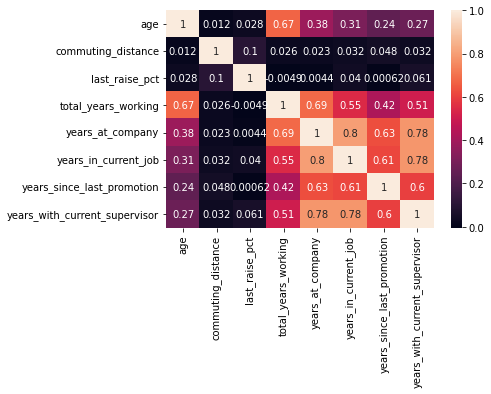

In [11]:
# insert code here
import seaborn as sns
correlation_martix = df[numerical_vars].corr()
sns.heatmap(correlation_martix, annot = True)
plt.show()

> Correlation matrix shows the relationship between two variables and not with a group of variables. Variance inflation factors help show the correlation with a group of other variables and therefore is chosen to find the multicollinearity in this dataset.

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[numerical_vars]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,16.669850,age
2,10.656507,last_raise_pct
4,9.588173,years_at_company
5,7.656341,years_in_current_job
3,7.622769,total_years_working
7,6.888652,years_with_current_supervisor
6,2.590716,years_since_last_promotion
1,2.389730,commuting_distance


> VIFs stands for variance inflation factors which identifies correlation between independent variables and the strength of the correlation. If VIF is below 5, it is considered uncorrelated. However, if it is in between 5 and 10, then it shows some correlations with other variables. If VIF is greater than 10, then generally the correlation is considered to be significant and those columns need to be handled. 

In [13]:
features.remove('age')
numerical_vars.remove('age')

In [14]:
X = df[numerical_vars]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,9.535979,years_at_company
4,7.649504,years_in_current_job
6,6.887962,years_with_current_supervisor
2,5.011180,total_years_working
1,3.940187,last_raise_pct
5,2.590647,years_since_last_promotion
0,2.366498,commuting_distance


# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [15]:
# insert code here
from sklearn.model_selection import train_test_split
X = df[features]
y = df['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')

Records in training data: 800
Records in test data: 200


In [16]:
type(y_test)

pandas.core.series.Series

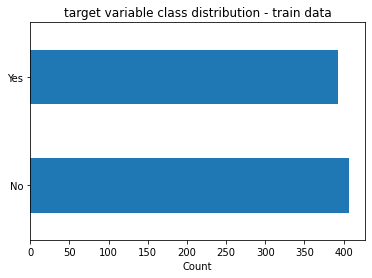

In [17]:
y_train.value_counts().plot.barh()
plt.title('target variable class distribution - train data')
plt.xlabel('Count')
plt.show()

# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [18]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# pipeline for numerical data
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy  = 'median')),
                          ('standardize', StandardScaler())])
X_train_num = num_pipeline.fit_transform(X_train[numerical_vars])
X_train_num.shape

(800, 7)

In [19]:
# pipeline for categorical data
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy = 'most_frequent')), 
                         ('dummy_encoding', OneHotEncoder(handle_unknown = 'ignore', drop = 'first'))])
X_train_cat = cat_pipeline.fit_transform(X_train[categorical_vars])
X_train_cat

<800x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3383 stored elements in Compressed Sparse Row format>

In [20]:
#'frequency_of_travel', 'department', 'gender', 'position', 'married_or_single'
(X_train['frequency_of_travel'].nunique()) +  (X_train['department'].nunique()) + (X_train['gender'].nunique()) + (X_train['position'].nunique()) + (X_train['married_or_single'].nunique()) - (5)

15

> This implies that our pipeline worked correct as we see 15 columns in the sparse matrix.

In [21]:
# pipeline for encoded categorical data
encoded_cat_pipeline = Pipeline([('impute_missing_encoded_cats', SimpleImputer(strategy = 'most_frequent'))])
X_train_encoded_cat = encoded_cat_pipeline.fit_transform(X_train[encoded_categorical_vars])
X_train_encoded_cat.shape

(800, 5)

In [22]:
# Creating the processing pipeline with all these three pipelines
Processing_pipeline = ColumnTransformer(transformers = [('num', num_pipeline, numerical_vars), 
                                                  ('cat', cat_pipeline, categorical_vars),
                                                  ('encoded_cat', encoded_cat_pipeline, encoded_categorical_vars)])
X_train_transformed = Processing_pipeline.fit_transform(X_train)
X_train_transformed.shape

(800, 27)

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [23]:
# insert code here
from sklearn.linear_model import LogisticRegression

Modeling_pipeline = Pipeline([('data_processing', Processing_pipeline), ('lm', LogisticRegression(penalty='none', max_iter= 1000))])
Modeling_pipeline.fit(X_train, y_train)
y_hat_test = Modeling_pipeline.predict(X_test) 
y_hat_train = Modeling_pipeline.predict(X_train)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_hat_train))
print(accuracy_score(y_test,y_hat_test))

0.72625
0.67


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_hat_train))
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

          No       0.74      0.71      0.73       407
         Yes       0.71      0.74      0.73       393

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800

              precision    recall  f1-score   support

          No       0.65      0.62      0.64        93
         Yes       0.68      0.71      0.70       107

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.67      0.67       200



The accuracy scores for the train and the test data are fairly close and therefore we can conclude that there is no overfitting on the train data. 

In [62]:
# predicting for one data point
X_test.iloc[1]

frequency_of_travel                Travel_Rarely
department                                 Sales
commuting_distance                             9
education                                      4
satisfaction_with_environment                  1
gender                                    Female
seniority_level                                2
position                         Sales Executive
satisfaction_with_job                          1
married_or_single                         Single
last_raise_pct                                17
last_performance_rating                        3
total_years_working                            6
years_at_company                               5
years_in_current_job                           2
years_since_last_promotion                     0
years_with_current_supervisor                  3
Name: 789, dtype: object

In [63]:
Xpoint = pd.DataFrame(X_test.iloc[0].values.reshape(1,-1), columns=X_test.iloc[0].index)
Xpoint

,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,Travel_Rarely,Research & Development,5,3,3,Female,1,Research Scientist,2,Single,12,3,4,4,3,1,2


In [67]:
Modeling_pipeline.predict(Xpoint)

array(['Yes'], dtype=object)

In [68]:
y_test.iloc[1]

'Yes'

### Deployment using Dockers and Github actions 

#### Pickling the model file for deployment

In [26]:
import pickle

In [27]:
# storing your model/model pipeline in a pickle file
pickle.dump(Modeling_pipeline, open('log_reg.pkl', 'wb'))

In [28]:
# this pickle file created can be loaded as follows
pickled_model = pickle.load(open('log_reg.pkl', 'rb'))

In [69]:
pickled_model.predict(X_test)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',

In [70]:
print(accuracy_score(y_test,pickled_model.predict(X_test)))

0.67


Same as what we got before!